In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_dfs = [train, test]
data = pd.concat(all_dfs).reset_index(drop=True)
print(len(test))
print(len(train))
print(len(data))

1459
1460
2919


/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [3]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [4]:
discrete_vars = [
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'MiscVal',
'MoSold',
'YrSold',
'SaleType',
'SaleCondition']

continuous_vars = [
'GarageYrBlt',
'GarageCars',
'GarageArea', 
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'MiscVal',
'MoSold',
'YrSold',
'PoolArea'
]
# data.groupby('GarageType')['Id'].count().sort_values(ascending=False).plot.bar(color='b')
discrete_eda = {}
for i in range(0,len(discrete_vars)):
    bleh = data.groupby(discrete_vars[i]).agg('count')
    discrete_eda[i] = pd.DataFrame(bleh[bleh.columns[0:1]].apply(lambda x:100 * x / x.sum()))
    
discrete_eda

{0:              1stFlrSF
 GarageType           
 2Types       0.832730
 Attchd      62.382332
 Basment      1.303403
 BuiltIn      6.734251
 CarPort      0.543085
 Detchd      28.204200, 1:                1stFlrSF
 GarageFinish           
 Fin           26.050725
 RFn           29.384058
 Unf           44.565217, 2:              1stFlrSF
 GarageQual           
 Ex           0.108696
 Fa           4.492754
 Gd           0.869565
 Po           0.181159
 TA          94.347826, 3:              1stFlrSF
 GarageCond           
 Ex           0.108696
 Fa           2.681159
 Gd           0.543478
 Po           0.507246
 TA          96.159420, 4:              1stFlrSF
 PavedDrive           
 N            7.399794
 P            2.124015
 Y           90.476190, 5:         1stFlrSF
 PoolQC          
 Ex          40.0
 Fa          20.0
 Gd          40.0, 6:         1stFlrSF
 Fence           
 GdPrv  20.665499
 GdWo   19.614711
 MnPrv  57.618214
 MnWw    2.101576, 7:               1stFlrSF
 MiscFea

In [6]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


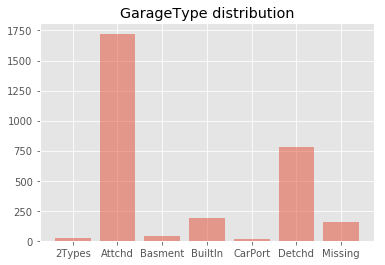

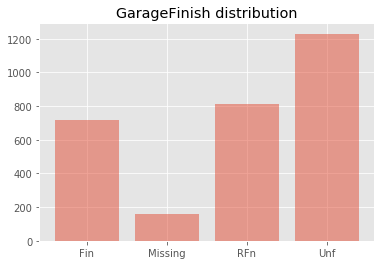

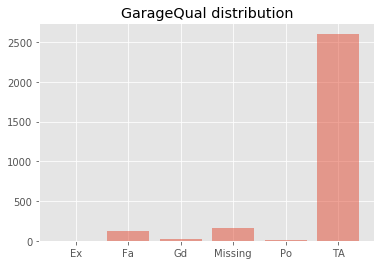

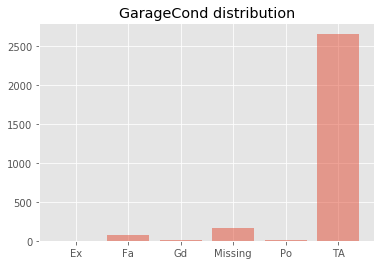

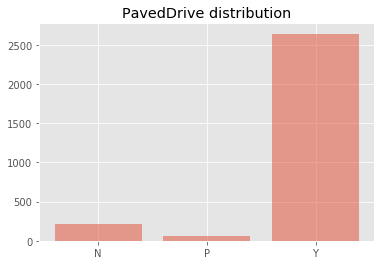

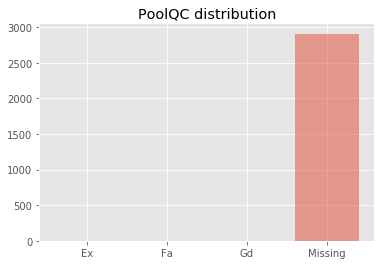

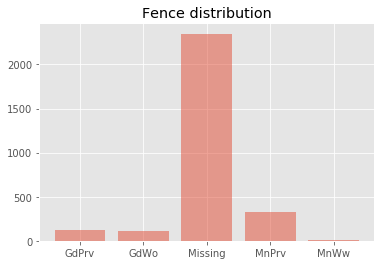

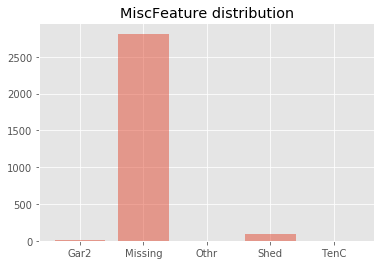

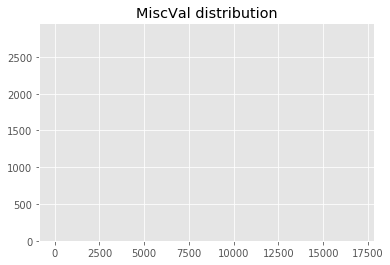

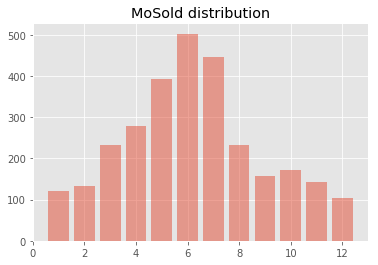

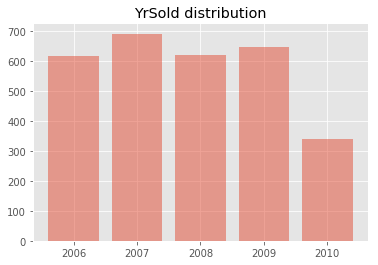

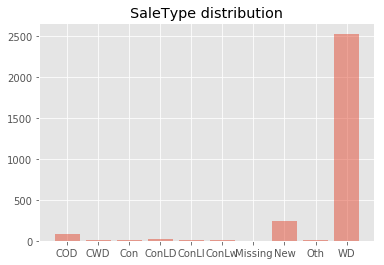

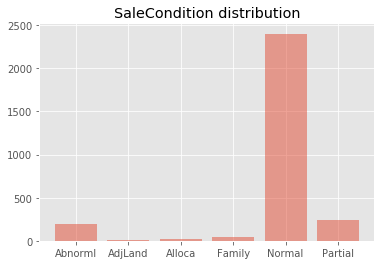

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [7]:
# x = list(data2['PoolQC'].astype('category').cat.categories)
# y = list(data2['PoolQC'].value_counts())
#plt.bar(x,y,align='center', alpha=0.5)
#plt.title(var_name + ' distribution')
# temp = pd.DataFrame(data2.groupby('PoolQC')['Id'].count()).reset_index()
# print(list(temp['PoolQC']))
# print(list(temp['Id']))

data2 = data.replace(np.nan,'Missing')

def bar_plot(var_name):
    temp = pd.DataFrame(data2.groupby(var_name)['Id'].count()).reset_index()
    plt.bar(list(temp[var_name]),list(temp['Id']),align='center', alpha=0.5)
    plt.title(var_name + ' distribution')
    return plt.show()

[bar_plot(discrete_vars[i]) for i in range(0,len(discrete_vars))]

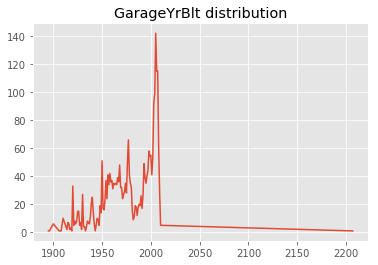

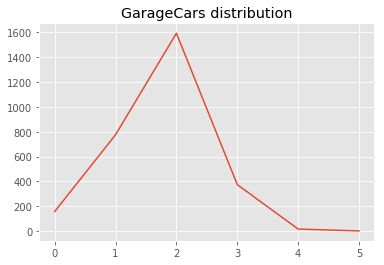

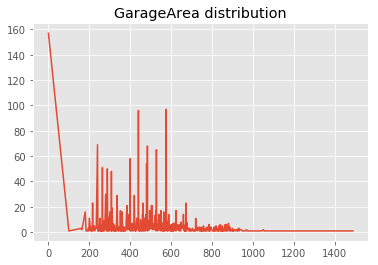

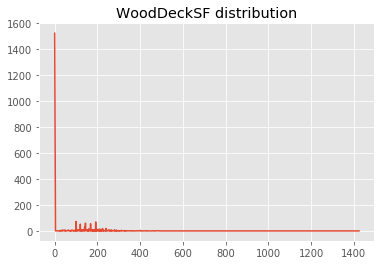

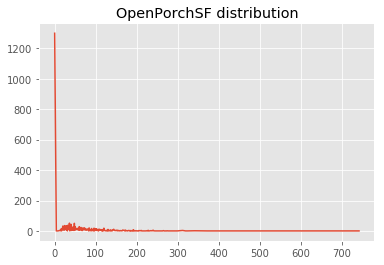

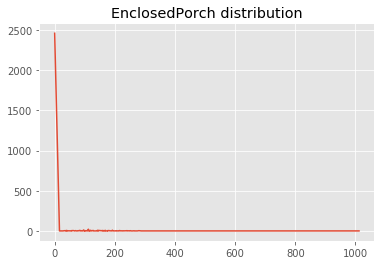

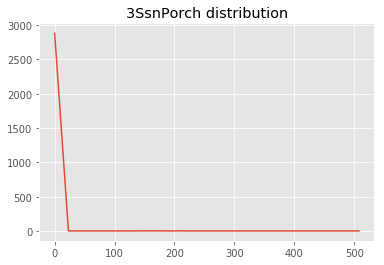

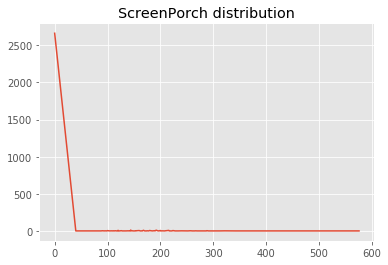

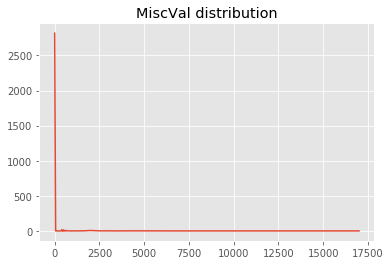

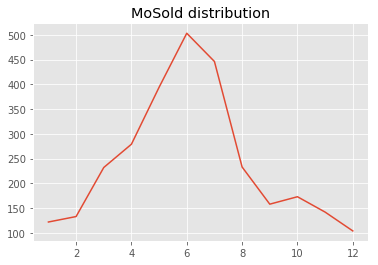

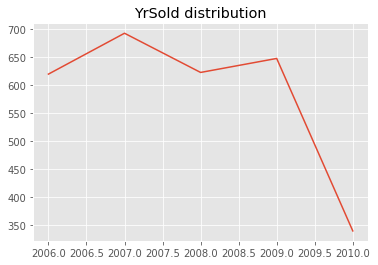

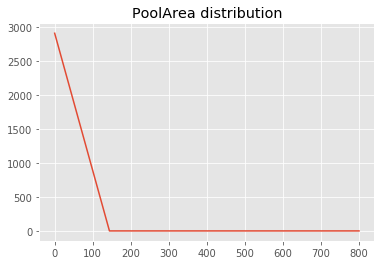

[None, None, None, None, None, None, None, None, None, None, None, None]

In [8]:
def line_plot(var_name):
    temp = pd.DataFrame(data.groupby(var_name)['Id'].count()).reset_index()
    plt.plot(list(temp[var_name]),list(temp['Id']))
    plt.title(var_name + ' distribution')
    return plt.show()

[line_plot(continuous_vars[i]) for i in range(0,len(continuous_vars))]

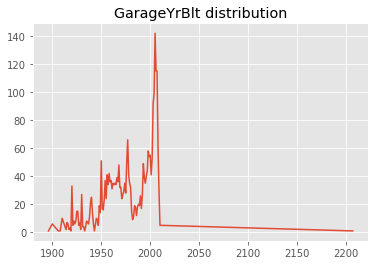

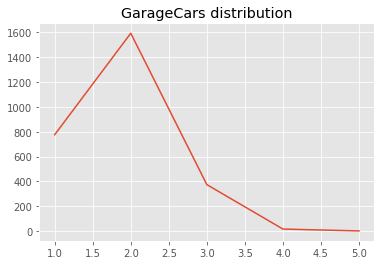

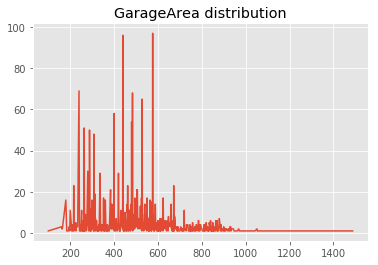

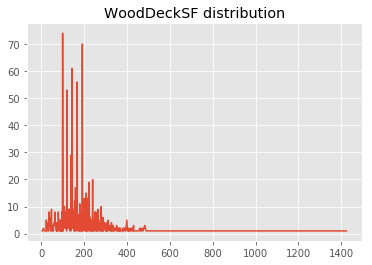

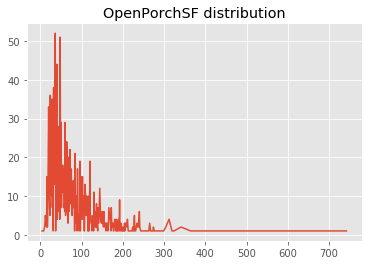

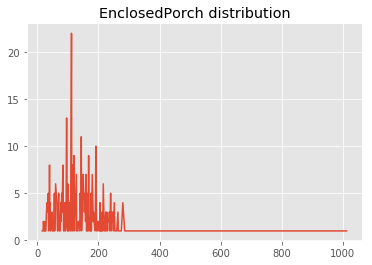

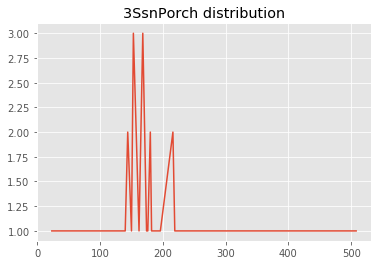

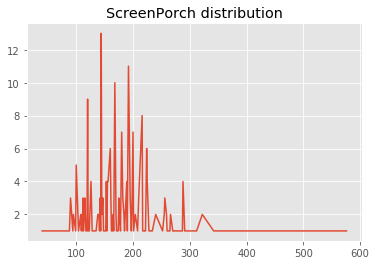

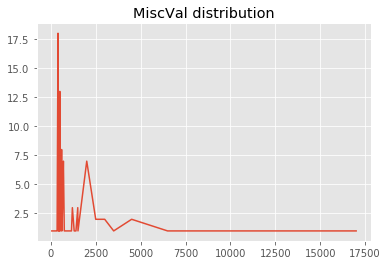

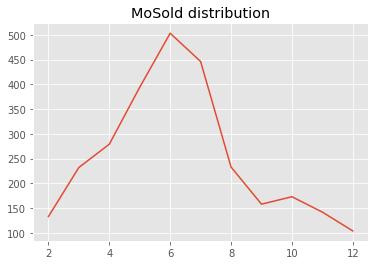

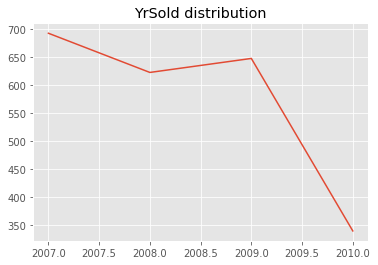

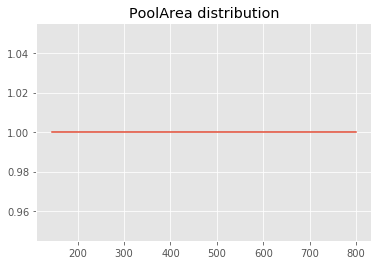

[None, None, None, None, None, None, None, None, None, None, None, None]

In [9]:
def line_plot2 (var_name):
    temp = pd.DataFrame(data.groupby(var_name)['Id'].count()).reset_index()
    plt.plot(list(temp[var_name][1:]),list(temp['Id'][1:]))
    plt.title(var_name + ' distribution')
    return plt.show()

[line_plot2(continuous_vars[i]) for i in range(0,len(continuous_vars))]

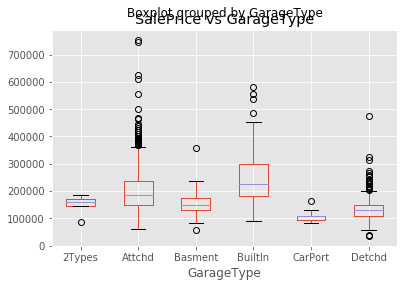

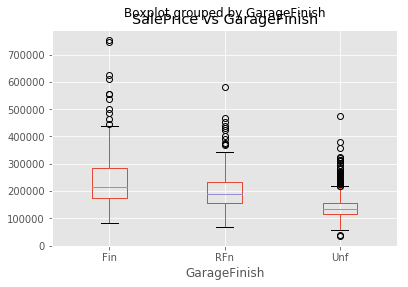

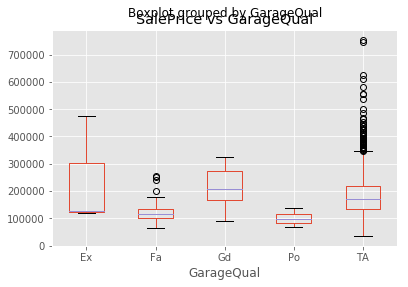

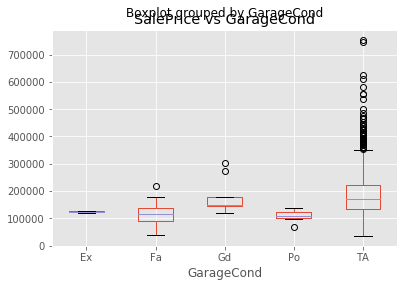

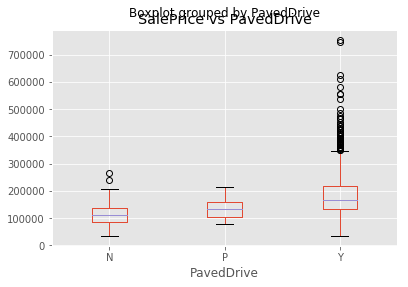

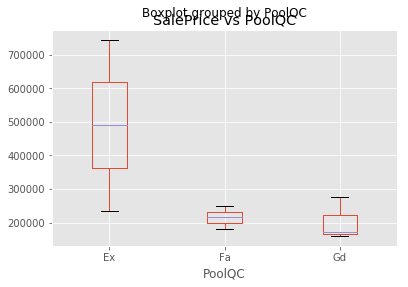

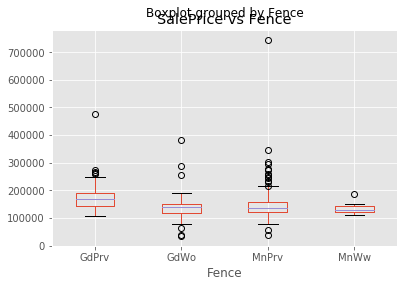

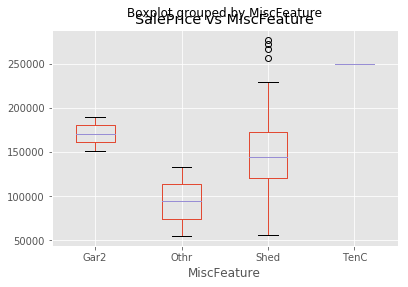

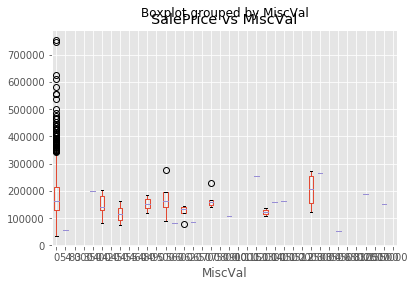

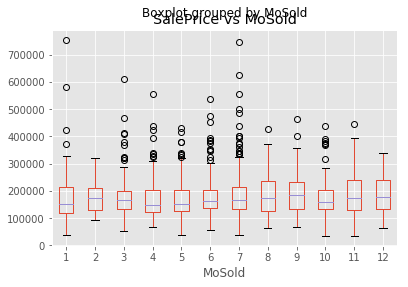

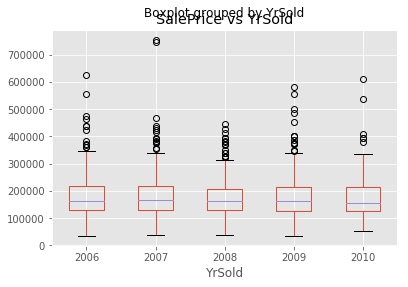

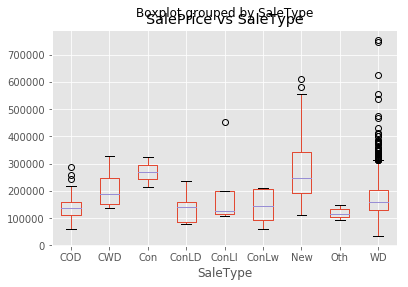

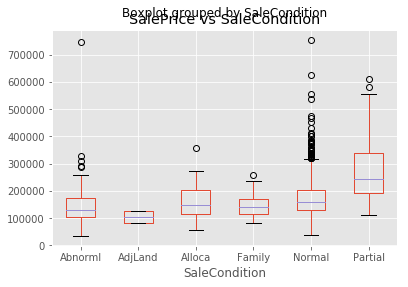

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [10]:
def boxplot (var_name):
    temp = data[[var_name, 'SalePrice']]
    temp.boxplot(by=var_name, column='SalePrice')
    plt.title('SalePrice vs ' + var_name)
    return plt.show()

[boxplot(discrete_vars[i]) for i in range(0,len(discrete_vars))]

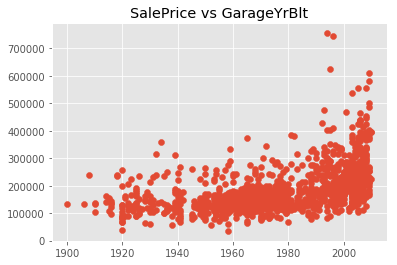

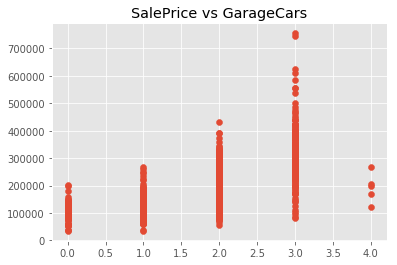

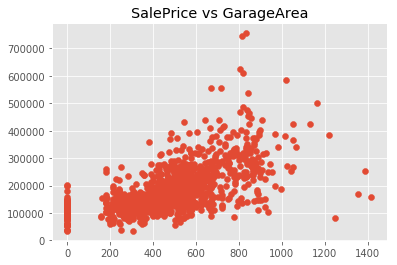

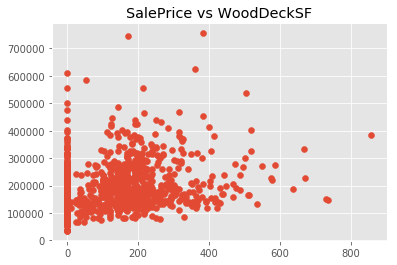

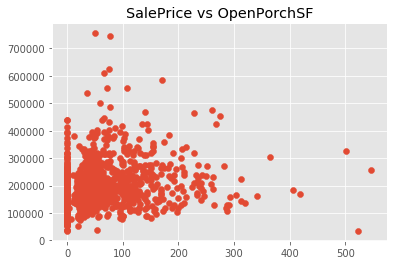

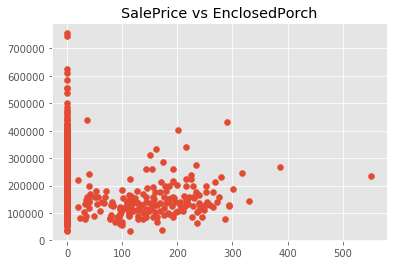

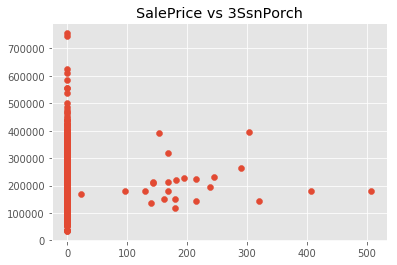

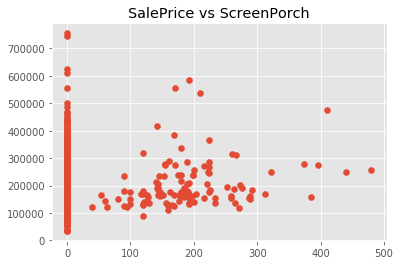

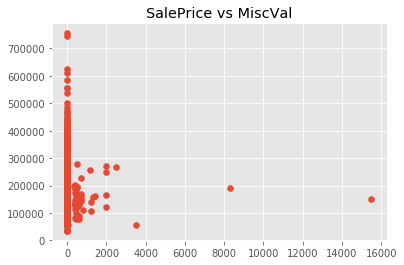

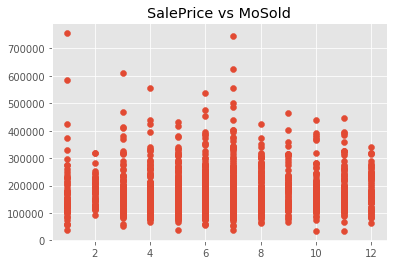

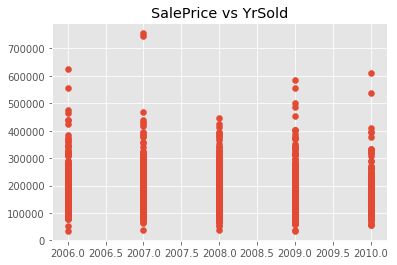

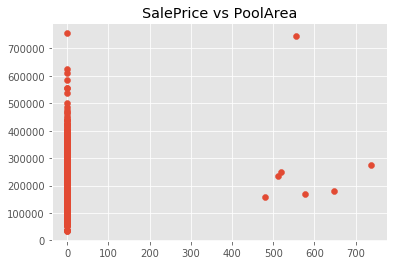

[None, None, None, None, None, None, None, None, None, None, None, None]

In [11]:
def scatter_plot (var_name):
    plt.scatter(data[var_name],data['SalePrice'])
    plt.title('SalePrice vs ' + var_name)
    return plt.show()

[scatter_plot(continuous_vars[i]) for i in range(0,len(continuous_vars))]

In [12]:
for i in range(0, len(continuous_vars)):
    print(continuous_vars[i] + ": " + str(sum(data[continuous_vars[i]]==0)))

GarageYrBlt: 0
GarageCars: 157
GarageArea: 157
WoodDeckSF: 1523
OpenPorchSF: 1298
EnclosedPorch: 2460
3SsnPorch: 2882
ScreenPorch: 2663
MiscVal: 2816
MoSold: 0
YrSold: 0
PoolArea: 2906


In [13]:
missing = data.isnull().sum()
missing[missing != 0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

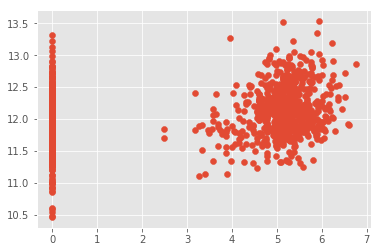

In [14]:
temp = [1 if x ==0 else x for x in data['WoodDeckSF']]
plt.scatter(np.log(temp),np.log(data['SalePrice']))

In [15]:
#treat missing variables, transforming variables

data['GarageType_clean'] = data['GarageType'].replace(np.nan, "No Garage")
data['GarageFinish_clean'] = data['GarageFinish'].replace(np.nan, "No Garage")
data['GarageArea_clean'] = [1 if x ==0 else x for x in data['GarageArea']]
data['GarageQual_clean'] = ['TA' if x == 'TA' else 'Other' if x in ['Fa','Gd','Po', 'Ex'] else 'No Garage' for x in data['GarageQual']]
data['GarageCond_clean'] = ['TA' if x == 'TA' else 'Other' if x in ['Fa','Gd','Po', 'Ex'] else 'No Garage' for x in data['GarageCond']]
data['WoodDeckSF_clean'] = [1 if x ==0 else x for x in data['WoodDeckSF']]
data['OpenPorchSF_clean'] = [1 if x ==0 else x for x in data['OpenPorchSF']]
data['ScreenPorch_clean'] = [0 if x ==0 else 1 for x in data['ScreenPorch']]
data['PoolQC_clean'] = data['PoolQC'].replace(np.nan, "No Pool")
data['Fence_clean'] = data['Fence'].replace(np.nan, "No Fence")
data['MiscFeature_clean'] = data['MiscFeature'].replace(np.nan, "No MiscFeat")
data['GarageCond_clean'] = ['TA' if x == 'TA' else 'Other' if x in ['Fa','Gd','Po'] else 'No Pool' for x in data['GarageCond']]

In [16]:
#transformations
data['GarageArea_clean_log'] = np.log(data['GarageArea_clean'])
data['WoodDeckSF_clean_log'] = np.log(data['WoodDeckSF_clean'])
data['OpenPorchSF_clean_log'] = np.log(data['OpenPorchSF_clean'])

In [17]:
#ordinal variables
GarageFinish = {'Fin': 1, 'RFn': 2, 'Unf': 3, 'No Garage':4}
data['GarageFinish_clean'] = data['GarageFinish_clean'].map(lambda x: GarageFinish.get(x, 0))

#minor corrections
#1 of SaleType is missing, imputing with mode
data['SaleType_clean'] = data['SaleType'].replace(np.nan, "WD")
# GarageYrBuilt = 2207 for one value in the test set. Should this be corrected??? Variable should be excluded anyway
# so maybe it doesn't matter?

In [87]:
# dummify variables
one_hot_df = pd.get_dummies(data, drop_first=True, dummy_na=True)
one_hot_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,MiscFeature_clean_nan,SaleType_clean_CWD,SaleType_clean_Con,SaleType_clean_ConLD,SaleType_clean_ConLI,SaleType_clean_ConLw,SaleType_clean_New,SaleType_clean_Oth,SaleType_clean_WD,SaleType_clean_nan
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,0,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
#Variables that need to be label count encoded
from LabelClass import LabelCountEncoder

label_count_df = data.copy()

for c in label_count_df.columns:
   if label_count_df[c].dtype == 'object':
       lce = LabelCountEncoder()
       label_count_df[c] = lce.fit_transform(label_count_df[c])

# data['GarageType_clean']
# data['GarageQual_clean']
# data['GarageCond_clean']
# data['PavedDrive']
# data['SaleType']
# data['SaleCondition']

In [21]:
label_count_df['GarageType_clean'].value_counts()

7    1723
6     779
5     186
4     157
3      36
2      23
1      15
Name: GarageType_clean, dtype: int64

In [22]:
import seaborn as sns
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = data.corr()

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

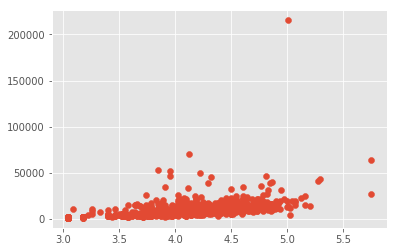

In [86]:
#data[['LotFrontage', 'LotArea', 'LotConfig', 'LotShape']]
plt.scatter(np.log(data['LotFrontage']), data['LotArea'])

In [83]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

temp = test[['LotArea', 'LotFrontage']]
temp = temp.dropna()

X = pd.DataFrame(temp['LotArea'])
Y = temp['LotFrontage']
linreg_1 = LinearRegression()
linreg_1.fit(X, Y)
print(linreg_1.coef_)
print(linreg_1.intercept_)
print(linreg_1.score(X, Y))

[0.00320437]
38.118229882785734
0.41552011540471123


In [84]:
temp = test[['LotFrontage', 'LotArea', 'LotConfig', 'LotShape']]
temp = temp.dropna()
temp

,LotFrontage,LotArea,LotConfig,LotShape
0,80.0,11622,Inside,Reg
1,81.0,14267,Corner,IR1
2,74.0,13830,Inside,IR1
3,78.0,9978,Inside,IR1
4,43.0,5005,Inside,IR1
5,75.0,10000,Corner,IR1
7,63.0,8402,Inside,IR1
8,85.0,10176,Inside,Reg
9,70.0,8400,Corner,Reg
10,26.0,5858,FR2,IR1
